In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogsvscats

100% 1.06G/1.06G [00:58<00:00, 22.6MB/s]
100% 1.06G/1.06G [00:58<00:00, 19.5MB/s]


In [ ]:
#unzip the file
import zipfile
zip_ref = zipfile.ZipFile('/content/dogsvscats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras import regularizers

In [ ]:
train_data = keras.utils.image_dataset_from_directory(
    directory = "/content/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),

)

val_data = keras.utils.image_dataset_from_directory(
    directory = "/content/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
def normalize(img,label):
  img = tf.cast(img/255. , tf.float32)
  return img,label


train_data = train_data.map(normalize)
val_data = val_data.map(normalize)

In [ ]:
model = Sequential()

model.add(Conv2D(64,kernel_size=(5,5),padding='same',strides=(2,2),activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

model.add(Conv2D(512,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Dropout(0.25))


model.add(Flatten())


model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      4864      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 256)       147712    
                                                                 
 batch_normalization_1 (Batc  (None, 62, 62, 256)      1

In [ ]:
model.compile(loss="binary_crossentropy",optimizer='RMSProp',metrics=['accuracy'])

In [ ]:
hist = model.fit(train_data,epochs=7,validation_data=val_data)

Epoch 1/7
625/625 [==============================] - 98s 133ms/step - loss: 0.6389 - accuracy: 0.6578 - val_loss: 0.6171 - val_accuracy: 0.6694
Epoch 2/7
625/625 [==============================] - 85s 135ms/step - loss: 0.4459 - accuracy: 0.7914 - val_loss: 0.4441 - val_accuracy: 0.7874
Epoch 3/7
625/625 [==============================] - 87s 139ms/step - loss: 0.3556 - accuracy: 0.8470 - val_loss: 0.4192 - val_accuracy: 0.8108
Epoch 4/7
625/625 [==============================] - 85s 135ms/step - loss: 0.3031 - accuracy: 0.8738 - val_loss: 0.4392 - val_accuracy: 0.8382
Epoch 5/7
625/625 [==============================] - 88s 139ms/step - loss: 0.2598 - accuracy: 0.8945 - val_loss: 0.3386 - val_accuracy: 0.8624
Epoch 6/7
625/625 [==============================] - 86s 138ms/step - loss: 0.2202 - accuracy: 0.9119 - val_loss: 0.3136 - val_accuracy: 0.8664
Epoch 7/7
625/625 [==============================] - 86s 138ms/step - loss: 0.1864 - accuracy: 0.9280 - val_loss: 0.4404 - val_accuracy:

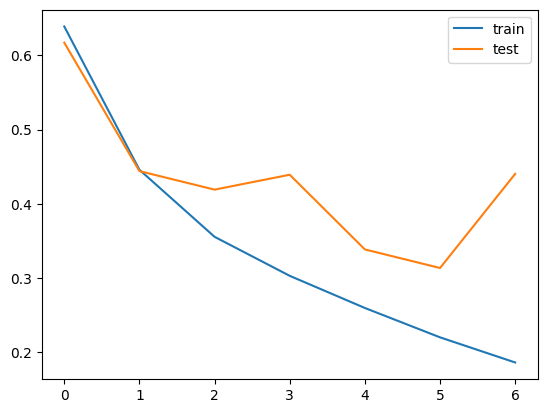

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history["loss"],label="train")
plt.plot(hist.history["val_loss"],label='test')
plt.legend()

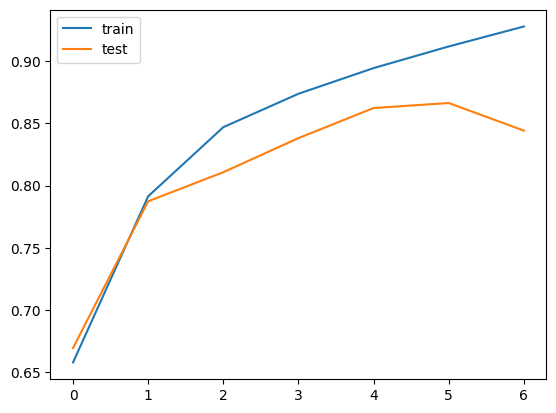

In [ ]:
plt.plot(hist.history["accuracy"],label="train")
plt.plot(hist.history["val_accuracy"],label='test')
plt.legend()

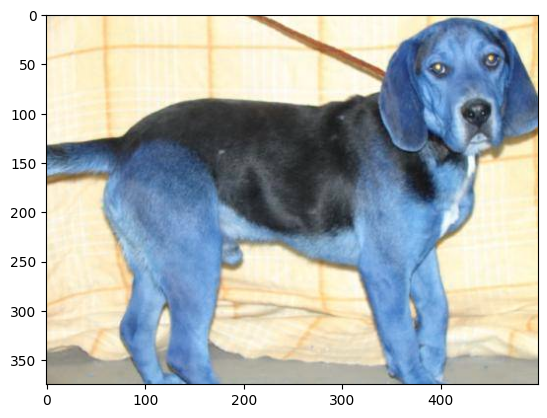

In [ ]:
import cv2
cat = cv2.imread('/content/test/dogs/dog.10433.jpg')
plt.imshow(cat)

In [ ]:
cat.shape

(375, 499, 3)

In [ ]:
cat = cv2.resize(cat,(256,256))

In [ ]:
cat = cat.reshape((1,256,256,3))

In [ ]:
prd = model.predict(cat)

1/1 [==============================] - 0s 20ms/step


In [ ]:
if(prd==0):
  print("CAT")
else:
  print("DOG")

DOG


In [ ]:
model.save("Model_catsVSdogs.h5")